In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [56]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
df=pd.read_csv('PATIENT SURVIVAL DATA/Dataset.csv')
df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [58]:
df.describe()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,91713.000000,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,...,83766.000000,83766.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000
mean,65606.079280,65537.131464,105.669262,0.086302,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,...,0.086787,0.043955,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638
std,37795.088538,37811.252183,62.854406,0.280811,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,...,0.247569,0.217341,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169
min,1.000000,1.000000,2.000000,0.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32852.000000,32830.000000,47.000000,0.000000,52.000000,23.641975,0.000000,162.500000,369.000000,0.035417,...,0.020000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65665.000000,65413.000000,109.000000,0.000000,65.000000,27.654655,0.000000,170.100000,504.000000,0.138889,...,0.050000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,98342.000000,98298.000000,161.000000,0.000000,75.000000,32.930206,0.000000,177.800000,679.000000,0.409028,...,0.130000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,131051.000000,131051.000000,204.000000,1.000000,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,...,0.990000,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
df['hospital_death'].value_counts()

hospital_death
0    83798
1     7915
Name: count, dtype: int64

In [60]:
df.isnull().any().sum()
df.isnull().sum().sort_values(ascending=True)

encounter_id            0
pre_icu_los_days        0
icu_type                0
icu_stay_type           0
icu_id                  0
                    ...  
h1_albumin_min      83824
h1_lactate_min      84369
h1_lactate_max      84369
h1_bilirubin_max    84619
h1_bilirubin_min    84619
Length: 186, dtype: int64

In [61]:
df.groupby('hospital_death').mean(numeric_only=True)

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
hospital_death,,,,,,,,,,,,,,,,,,,,,
0,65666.975501,65480.459629,105.693501,61.748741,29.264902,0.194873,169.706029,508.287716,0.787357,0.0,...,0.062882,0.024799,0.000818,0.014188,0.227215,0.011639,0.024012,0.006301,0.003763,0.018409
1,64961.356412,66137.129754,105.412634,68.494156,28.340398,0.065824,168.952094,509.098547,1.348287,0.0,...,0.334838,0.242726,0.001277,0.031673,0.203704,0.027331,0.049042,0.015198,0.008046,0.044317


<Axes: xlabel='hospital_death', ylabel='count'>

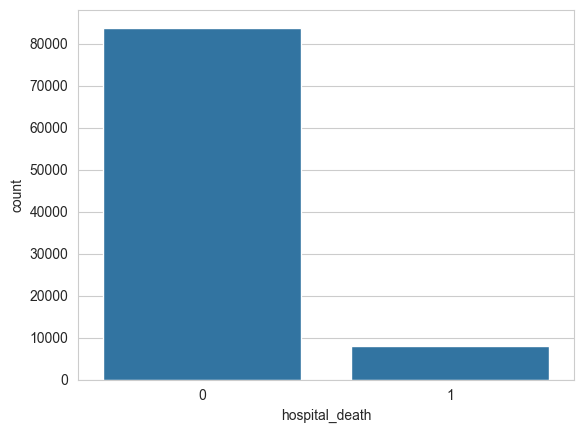

In [62]:
sns.set_style('whitegrid')
sns.countplot(x='hospital_death',data=df)

In [63]:
object_columns = df.select_dtypes(include=['object']).columns
object_columns 

Index(['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source',
       'icu_stay_type', 'icu_type', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object')

<Axes: xlabel='hospital_death', ylabel='Density'>

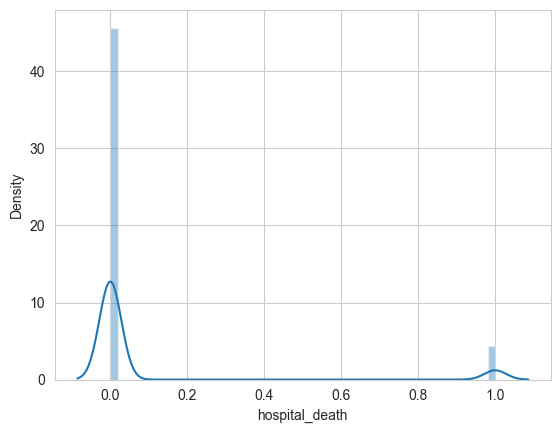

In [64]:
sns.distplot(df['hospital_death'])

<Axes: xlabel='hepatic_failure', ylabel='Density'>

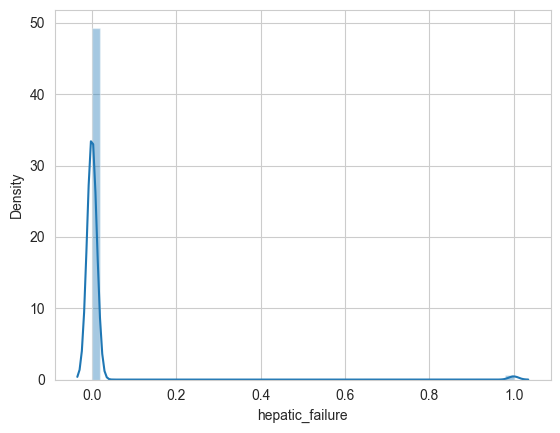

In [65]:
sns.distplot(df['hepatic_failure']) 

<Axes: xlabel='solid_tumor_with_metastasis', ylabel='Density'>

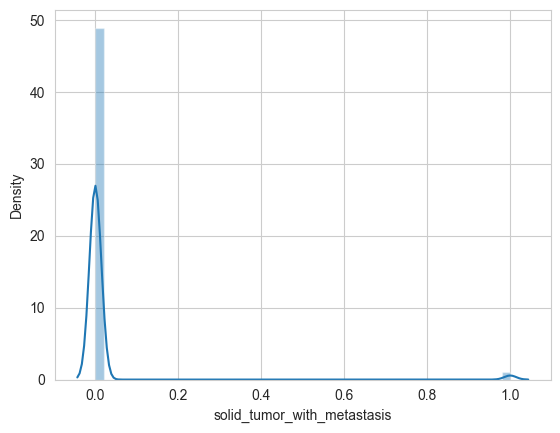

In [66]:
sns.distplot(df['solid_tumor_with_metastasis']) 

In [67]:
# Define 'cols' as all columns with numeric data types
cols = df.select_dtypes(include=[np.number]).columns

In [68]:
df[cols] = df[cols].fillna(df[cols].mean())
df[cols]

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,66154,25312,118,0,68.000000,22.730000,0,180.3,92,0.541667,...,0.100000,0.050000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,114252,59342,81,0,77.000000,27.420000,0,160.0,90,0.927778,...,0.470000,0.290000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,119783,50777,118,0,25.000000,31.950000,0,172.7,93,0.000694,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,79267,46918,118,0,81.000000,22.640000,1,165.1,92,0.000694,...,0.040000,0.030000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,92056,34377,33,0,19.000000,29.185818,0,188.0,91,0.073611,...,0.086787,0.043955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,0,75.000000,23.060250,0,177.8,927,0.298611,...,0.120000,0.050000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
91709,66119,13486,121,0,56.000000,47.179671,0,183.0,925,0.120139,...,0.030000,0.020000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91710,8981,58179,195,0,48.000000,27.236914,0,170.2,908,0.046528,...,0.050000,0.020000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
91711,33776,120598,66,0,62.309516,23.297481,0,154.9,922,0.081944,...,0.070000,0.020000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
object_columns = ['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source',
       'icu_stay_type', 'icu_type', 'apache_3j_bodysystem',
       'apache_2_bodysystem']

for i in object_columns:
    df[i].fillna(df[i].mode()[0], inplace=True)
    print(i)

ethnicity
gender
hospital_admit_source
icu_admit_source
icu_stay_type
icu_type
apache_3j_bodysystem
apache_2_bodysystem


In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
object_columns = ['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source',
       'icu_stay_type', 'icu_type', 'apache_3j_bodysystem',
       'apache_2_bodysystem']
df[object_columns] = df[object_columns].apply(le.fit_transform)
df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730000,0,2,1,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9,0
1,114252,59342,81,0,77.0,27.420000,0,2,0,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8,6
2,119783,50777,118,0,25.0,31.950000,0,2,0,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,3
3,79267,46918,118,0,81.0,22.640000,1,2,0,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,92056,34377,33,0,19.0,29.185818,0,2,1,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,7


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int32(8), int64(8)
memory usage: 127.3 MB


In [72]:
X = df.drop(columns='hospital_death', axis=1)
Y = df['hospital_death']
X

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,68.000000,22.730000,0,2,1,180.3,4,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9,0
1,114252,59342,81,77.000000,27.420000,0,2,0,160.0,4,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8,6
2,119783,50777,118,25.000000,31.950000,0,2,0,172.7,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,3
3,79267,46918,118,81.000000,22.640000,1,2,0,165.1,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,92056,34377,33,19.000000,29.185818,0,2,1,188.0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,75.000000,23.060250,0,2,1,177.8,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,9,0
91709,66119,13486,121,56.000000,47.179671,0,2,0,183.0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0
91710,8981,58179,195,48.000000,27.236914,0,2,1,170.2,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5,3
91711,33776,120598,66,62.309516,23.297481,0,2,0,154.9,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,6


In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [74]:
print(X.shape,X_train.shape,X_test.shape)

(91713, 185) (73370, 185) (18343, 185)


In [75]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, Y_train)
mutual_info

array([0.        , 0.0003869 , 0.00555887, 0.00914875, 0.0009841 ,
       0.0042481 , 0.0117237 , 0.0100303 , 0.        , 0.01010574,
       0.00856238, 0.00875616, 0.        , 0.00739471, 0.00324252,
       0.00107604, 0.00097345, 0.01496827, 0.03385478, 0.03897804,
       0.00596266, 0.        , 0.01100734, 0.0173097 , 0.01713871,
       0.02949655, 0.03927667, 0.04211307, 0.        , 0.03272987,
       0.00799514, 0.01477036, 0.00410598, 0.01136807, 0.01913372,
       0.02379676, 0.02398724, 0.02174921, 0.03083249, 0.00578392,
       0.00614654, 0.02051624, 0.01048387, 0.02954507, 0.01120054,
       0.01034711, 0.01518845, 0.00048421, 0.01950597, 0.00210661,
       0.01931185, 0.01407787, 0.01427684, 0.01575896, 0.01627469,
       0.00313728, 0.02439315, 0.00190286, 0.02106241, 0.01047   ,
       0.01095674, 0.01108575, 0.02249387, 0.01546207, 0.01752791,
       0.00287532, 0.02664846, 0.00330995, 0.02636164, 0.01504032,
       0.02115169, 0.01494507, 0.01320854, 0.00169471, 0.01021

In [77]:
 mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

apache_4a_icu_death_prob         0.074151
apache_4a_hospital_death_prob    0.073835
gcs_motor_apache                 0.042113
gcs_eyes_apache                  0.039277
apache_3j_diagnosis              0.038978
                                   ...   
arf_apache                       0.000000
height                           0.000000
icu_stay_type                    0.000000
gcs_unable_apache                0.000000
encounter_id                     0.000000
Length: 185, dtype: float64

<Axes: >

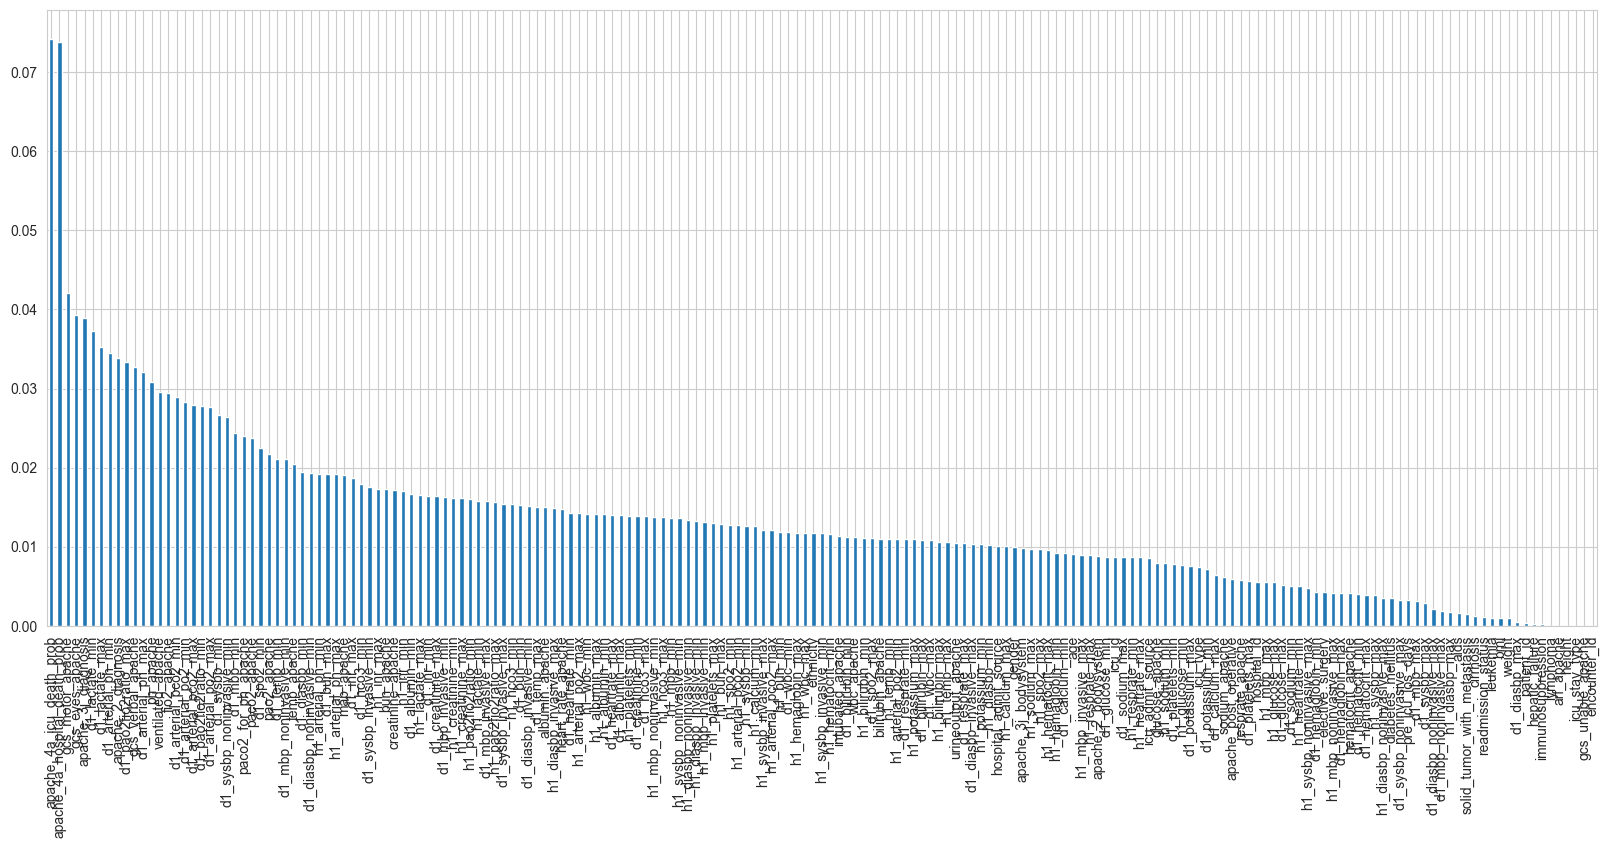

In [78]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [79]:
from sklearn.feature_selection import SelectKBest
sel_six_cols = SelectKBest(mutual_info_classif, k=6)
sel_six_cols.fit(X_train, Y_train)

SelectKBest(k=6,
            score_func=<function mutual_info_classif at 0x0000026587BFDB20>)

In [81]:
X_train_new = sel_six_cols.transform(X_train)
X_test_new = sel_six_cols.transform(X_test)

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_new)
X_test_std = scaler.transform(X_test_new)

In [84]:
from keras import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(12, input_dim=6, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [85]:
import tensorflow as tf
model.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.02),
    metrics = [
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
tf.keras.metrics.Recall(name='recall')
]
)

In [86]:
history = model.fit(X_train_std, Y_train, epochs=20, validation_split=0.2, batch_size=10)

Epoch 1/20

5870/5870 [==============================] - 39s 6ms/step - loss: 0.2284 - accuracy: 0.9192 - precision: 0.6392 - recall: 0.1930 - val_loss: 0.2205 - val_accuracy: 0.9237 - val_precision: 0.6439 - val_recall: 0.2534
Epoch 2/20
5870/5870 [==============================] - 33s 6ms/step - loss: 0.2236 - accuracy: 0.9207 - precision: 0.6570 - recall: 0.2105 - val_loss: 0.2208 - val_accuracy: 0.9212 - val_precision: 0.7819 - val_recall: 0.1164
Epoch 3/20
5870/5870 [==============================] - 34s 6ms/step - loss: 0.2235 - accuracy: 0.9213 - precision: 0.6673 - recall: 0.2146 - val_loss: 0.2341 - val_accuracy: 0.9179 - val_precision: 0.5318 - val_recall: 0.3840
Epoch 4/20
5870/5870 [==============================] - 38s 6ms/step - loss: 0.2240 - accuracy: 0.9207 - precision: 0.6571 - recall: 0.2117 - val_loss: 0.2206 - val_accuracy: 0.9201 - val_precision: 0.7078 - val_recall: 0.1227
Epoch 5/20
5870/5870 [==============================] - 36s 6ms/step - loss: 0.2238 - accur

In [92]:
# Evaluate the model
results = model.evaluate(X_test_std, Y_test)

# Unpack the results
loss, accuracy, precision, recall = results

# Print the metrics
print('Accuracy: %.2f' % (accuracy * 100))
print('Precision: %.2f' % (precision * 100))
print('Recall: %.2f' % (recall * 100))

574/574 [==============================] - 2s 3ms/step - loss: 0.2159 - accuracy: 0.9218 - precision: 0.9348 - recall: 0.0292
Accuracy: 92.18
Precision: 93.48
Recall: 2.92


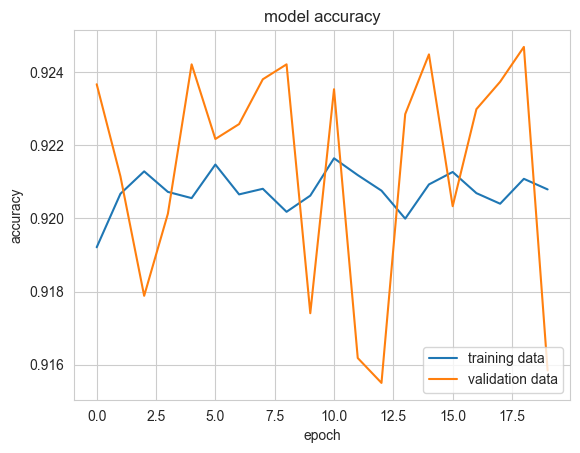

In [93]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc='lower right')

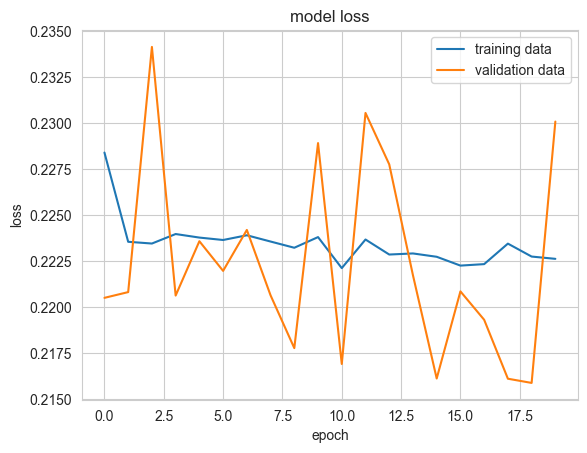

In [94]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc='upper right')

In [96]:
model.save('keras_model.h5')

In [101]:
from keras.models import load_model
model = load_model('keras_model.h5')

In [102]:
print(sorted(X_test['apache_3j_diagnosis'].unique()))

[0.03, 0.04, 0.09, 0.11, 0.14, 0.18, 0.19, 0.2, 0.22, 0.23, 0.24, 0.25, 101.01, 102.01, 102.02, 103.01, 104.01, 105.01, 105.02, 106.01, 107.01, 108.01, 109.01, 109.02, 109.03, 109.04, 109.05, 109.06, 109.07, 109.08, 109.09, 109.1, 109.11, 109.12, 109.13, 109.14, 109.15, 109.16, 110.01, 111.01, 201.01, 202.01, 203.01, 204.01, 206.01, 207.01, 208.01, 209.01, 210.01, 210.02, 211.01, 211.02, 211.03, 211.04, 211.05, 211.06, 211.07, 211.08, 211.09, 211.1, 211.11, 211.12, 212.01, 212.02, 213.01, 301.01, 301.02, 301.03, 303.01, 305.01, 305.02, 306.01, 307.01, 307.02, 307.03, 307.04, 307.05, 308.01, 309.01, 310.01, 311.01, 312.01, 312.02, 312.03, 312.04, 312.05, 313.01, 313.02, 313.03, 313.04, 313.05, 401.01, 402.01, 402.02, 403.01, 404.01, 404.02, 404.03, 405.01, 406.01, 406.02, 406.03, 406.04, 407.01, 408.01, 408.02, 409.01, 409.02, 410.01, 501.01, 501.02, 501.03, 501.04, 501.05, 501.06, 502.01, 558.2163765284952, 601.01, 601.02, 601.03, 601.04, 601.05, 601.06, 601.07, 601.08, 602.01, 602.02,

In [103]:
print(sorted(X_test['gcs_motor_apache'].unique()))

[1.0, 2.0, 3.0, 4.0, 5.0, 5.471195385917249, 6.0]


In [104]:
print(sorted(X_test['d1_lactate_max'].unique()))

[0.4, 0.5, 0.54, 0.56, 0.57, 0.59, 0.6, 0.61, 0.64, 0.68, 0.69, 0.7, 0.75, 0.77, 0.78, 0.8, 0.81, 0.82, 0.84, 0.85, 0.86, 0.87, 0.89, 0.9, 0.91, 0.92, 0.95, 0.96, 0.99, 1.0, 1.01, 1.02, 1.03, 1.05, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.13, 1.14, 1.15, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.3, 1.31, 1.33, 1.34, 1.35, 1.36, 1.4, 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5, 1.52, 1.53, 1.54, 1.55, 1.56, 1.58, 1.6, 1.61, 1.64, 1.65, 1.67, 1.7, 1.71, 1.72, 1.73, 1.75, 1.78, 1.79, 1.8, 1.82, 1.84, 1.85, 1.86, 1.87, 1.88, 1.9, 1.91, 1.92, 1.93, 1.94, 1.96, 1.99, 2.0, 2.01, 2.04, 2.05, 2.06, 2.08, 2.1, 2.11, 2.14, 2.17, 2.19, 2.2, 2.23, 2.25, 2.29, 2.3, 2.32, 2.34, 2.35, 2.36, 2.39, 2.4, 2.41, 2.44, 2.45, 2.47, 2.49, 2.5, 2.54, 2.58, 2.6, 2.62, 2.64, 2.7, 2.74, 2.77, 2.8, 2.82, 2.88, 2.9, 2.9273825963889006, 2.98, 3.0, 3.03, 3.1, 3.11, 3.12, 3.13, 3.2, 3.25, 3.28, 3.3, 3.31, 3.32, 3.37, 3.4, 3.42, 3.43, 3.44, 3.5, 3.6, 3.63, 3.66, 3.67, 3.7, 3.72,

In [106]:
import shap
shap.initjs()

In [107]:
X_sample = pd.DataFrame(X_train_new, columns=X_train.columns[sel_six_cols.get_support()]).sample(100)
X_sample

,apache_3j_diagnosis,gcs_eyes_apache,gcs_motor_apache,d1_lactate_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob
35823,501.04,3.0,6.0,2.300000,0.090000,0.040000
27831,1405.01,4.0,6.0,2.125128,0.030000,0.010000
45106,109.10,1.0,1.0,4.000000,0.610000,0.460000
40124,107.01,4.0,6.0,2.125128,-1.000000,-1.000000
68814,405.01,3.0,6.0,2.125128,0.030000,0.010000
...,...,...,...,...,...,...
60623,401.01,3.0,6.0,2.125128,0.030000,0.020000
6839,403.01,1.0,1.0,1.800000,0.680000,0.580000
41055,106.01,4.0,6.0,2.125128,0.030000,0.010000
40207,109.14,4.0,6.0,2.125128,0.110000,0.060000


In [108]:
explainer = shap.KernelExplainer(model.predict, X_train_new)

2293/2293 [==============================] - 7s 3ms/step


Using 73370 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [109]:
shap_values = explainer.shap_values(X_sample)

  0%|          | 0/100 [00:00<?, ?it/s]

142155/142155 [==============================] - 298s 2ms/step


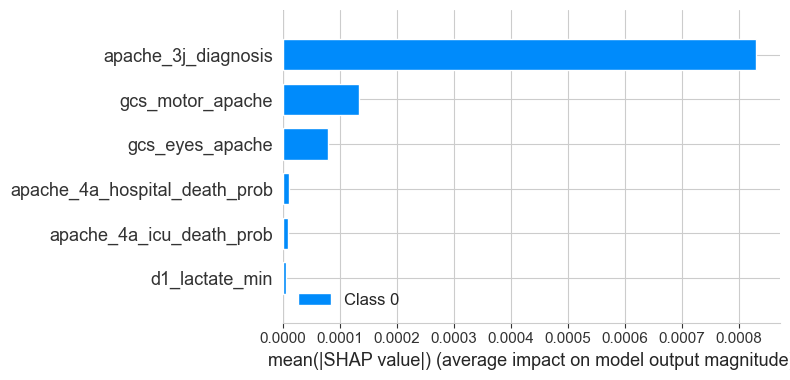

In [110]:
shap.summary_plot(shap_values, X_sample, plot_type="bar")

In [111]:
shap.force_plot(explainer.expected_value[0], shap_values[0], features=X_sample)

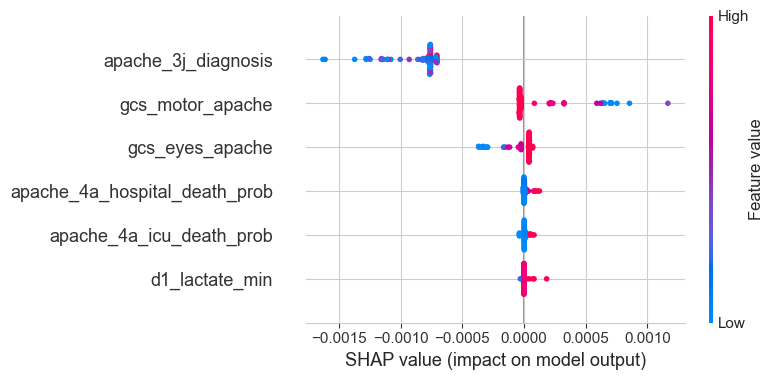

In [112]:
shap.summary_plot(shap_values[0], features=X_sample)